## **Jobsheet 9 | Pertemuan 9**
## **Perceptron & ANN**

----

>### Data Mahasiswa
><p>Nama : Alvian Nur Firdaus<p>
>Kelas : 3H<p>
>Nim : 2141720022<p>
>Prodi : D-IV Teknik Inormatika<p>
>Jurusan : Teknologi Inormasii<p>
>

----

### **Daftar Isi**
Praktikum 1<p>
Praktikum 2<p>
Praktikum 3<p>
Praktikum 4<p>
Tugas (klik)<p>

----


### **Praktikum 1**
Klasifikasi Iris dengan Perceptron<p>

<!-- **Download Dataset Terlebih Dahulu**<p> 
[Data Set web.csv(klik)](data/Iris.csv) -->

### **Deskripsi**
Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.<p>
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.


### **Langkah 1-Import Library**



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

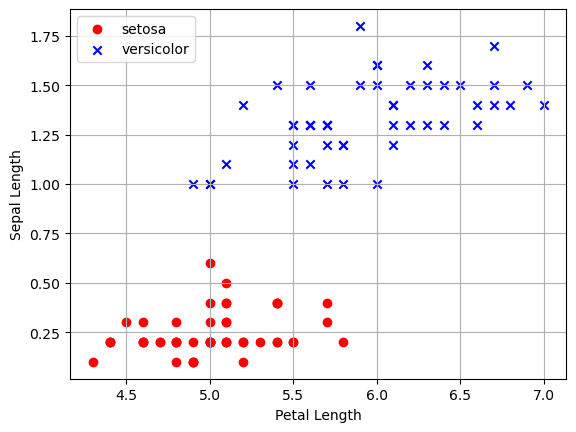

In [19]:
df = pd.read_csv('data/Iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### **Langkah 3 - Membuat Kelas Perceptron**

In [20]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Labe**

In [21]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### **Langkah 5 - Fitting Model**

In [22]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

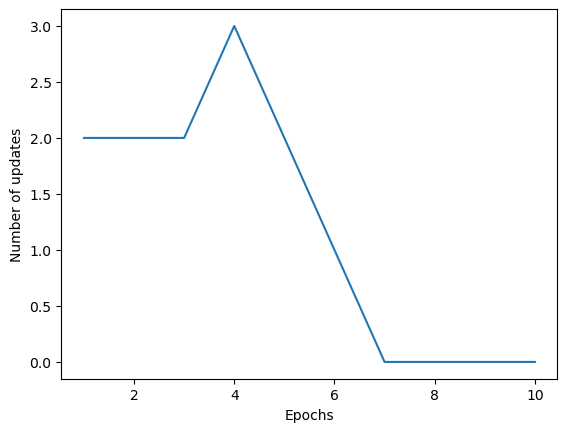

In [23]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### **Langkah 7 - Visualiasasi Decision Boundary**

In [24]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

----

### **Praktikum 2**
Klasifikasi Berita dengan Perceptron<p>

### **Deskripsi**
Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron

### **Langkah 1 - Import Library**

In [25]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### **Langkah 2 - Pilih Label dan Split Data**

In [26]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [27]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Penjelasan**<p>
Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.


---

### **Praktikum 3**
Nilai Logika XOR dengan MLP<p>

### **Deskripsi**
Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.


### **Langkah 1 - Import Library**

In [28]:
from sklearn.neural_network import MLPClassifier

### **Langkah 2 - Buat data**

In [29]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### **Langkah 3 - Fit Model**

In [30]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### **Langkah 4 - Prediksi**

In [31]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


---

### **Praktikum 4**
Klasifikasi dengan ANN<p>

### **Deskripsi**
Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

**Download Dataset Terlebih Dahulu**<p> 
[Data Set Churn_Modelling.csv(klik)](data/Churn_Modelling.csv)


### **Perhatian**
Pada praktikum ini, Anda akan menggunakan library tensorflow dari google. Oleh karena itu, Anda diharuskan untuk menginstal tensorflow terlebih dahulu.<p>
Anda juga perlu menyesuaikan instalasi tensorflow yang Anda gunakan pada komputer lokal, apakah komputasi pada,
- CPU
- GPU (GPU support CUDA)
- Apple Silicon (M1/M2)

Panduan instalasi,
- https://www.tensorflow.org/install
- https://developer.apple.com/metal/tensorflow-plugin/
- https://caffeinedev.medium.com/how-to-install-tensorflow-on-m1-mac-8e9b91d93706


### **Pra Pengolahan Data**
### **Langkah 1 - Import Library**

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

### **Langkah 2 - Load data**

In [33]:
dataset = pd.read_csv('data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

**Cek data (X)**

In [34]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### **Langkah 3 - Encoding Data Kategorikal**

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

### **Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### **Langkah 5 - Split Data**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Langkah 6 - Scaling Fitur**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Membuat Model ANN**
### **Langkah 1 - Inisiasi Model ANN**

In [40]:
ann = tf.keras.models.Sequential()

### **Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [41]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### **Langkah 3 - Membuat Hidden Layer Kedua**

In [42]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### **Langkah 4 - Membuat Output Layer**

In [43]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**
### **Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [44]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Langkah 2 - Fitting Model**

In [45]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.6120 - accuracy: 0.6955
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.7964
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4378 - accuracy: 0.8056
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8126
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8264
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3925 - accuracy: 0.8345
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8430
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3698 - accuracy: 0.8489
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3624 - accura

### **Membuat Prediksi**
Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

### **Modelkan Data Baru dan Buat Prediksi**

In [46]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 332ms/step
[[False]]


Apakah hasilnya **False**?<p>
Jawab : ya

### **Prediksi Dengan Data Testing**

In [47]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 4ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### **Cek Akurasi dan Confusion Matrix**

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1513   82]
 [ 199  206]]


0.8595

**Hasil (bisa jadi berbeda),**

----

### **Tugas**


*  Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
*  Anda diperbolehkan melakukan eksplorasi terhadap,
    1. Metode pra pengolahan
    2. Pemilihan fitur
    3. Arsitektur ANN
    4. Fungsi Aktiviasi

*  ANN diimplementasikan dengan menggunakan tensorflow.
*  DIKERJAKAN SECARA BERKELOMPOK
*  JELASKAN HASIL YANG ANDA DAPATKAN,
    1. AKURASI
    2. CONFUSION MATRIX
    3. KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam

## **Load Data**

In [2]:
# Unduh dataset MNIST dari scikit-learn
mnist = fetch_openml('mnist_784')



c:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Pisahkan data gambar dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

## **Pra-pemrosesan**

### **Scaling**

In [4]:
X /= 255.0

### **Flatten**

In [5]:
#images = images.values.reshape(images.shape[0], -1)

## **Split Data**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Ektraksi Fitur**

In [7]:
# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 100 komponen)
n_components = 200  # Ubah sesuai dengan kebutuhan Anda
pca = PCA(n_components=n_components)

# Fit-transform pada data pelatihan
X_train_pca= pca.fit_transform(X_train)

# Transformasi data pengujian
X_test_pca = pca.transform(X_test)

## **Arsitektur Model ANN**

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(n_components,)),
    #layers.Input(shape = n_components),
    layers.Dense(n_components, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## **Kompilasi Model**

In [9]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 53714 (209.82 KB)
Trainable params: 53714 (209.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training Model**

In [11]:
history = model.fit(X_train_pca, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1400/1400 [==============================] - 11s 6ms/step - loss: 0.2682 - accuracy: 0.9248 - val_loss: 0.1327 - val_accuracy: 0.9597
Epoch 2/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0885 - accuracy: 0.9735 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 3/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0497 - accuracy: 0.9852 - val_loss: 0.1024 - val_accuracy: 0.9688
Epoch 4/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0937 - val_accuracy: 0.9717
Epoch 5/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.1012 - val_accuracy: 0.9717
Epoch 6/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.1143 - val_accuracy: 0.9716
Epoch 7/20
1400/1400 [==============================] - 8s 6ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.1151 - val_accuracy

In [12]:
# Kemudian Anda dapat mengakses informasi seperti ini:
loss = history.history['loss']  # Histori nilai loss pada setiap epoch
val_loss = history.history['val_loss']  # Histori nilai loss pada setiap epoch saat validasi
accuracy = history.history['accuracy']  # Histori nilai akurasi pada setiap epoch
val_accuracy = history.history['val_accuracy']  # Histori nilai akurasi pada setiap epoch saat validasi

print("Loss:")
print(loss)

print("Validation Loss:")
print(val_loss)

print("Accuracy:")
print(accuracy)

print("Validation Accuracy:")
print(val_accuracy)

Loss:
[0.2681710422039032, 0.08852840960025787, 0.049660034477710724, 0.031936004757881165, 0.02118820697069168, 0.015602043829858303, 0.014789260923862457, 0.012449090369045734, 0.012028543278574944, 0.008491640910506248, 0.009793739765882492, 0.008360529318451881, 0.007005519699305296, 0.008564317598938942, 0.00705476151779294, 0.006353101693093777, 0.008015147410333157, 0.007153857033699751, 0.004281122237443924, 0.008314698003232479]
Validation Loss:
[0.13271194696426392, 0.09263509511947632, 0.10237898677587509, 0.09371214359998703, 0.10122489929199219, 0.11431543529033661, 0.11505556106567383, 0.1057358980178833, 0.12489640712738037, 0.13810959458351135, 0.13346810638904572, 0.14563603699207306, 0.1577344685792923, 0.1505729705095291, 0.15432079136371613, 0.17124798893928528, 0.16933400928974152, 0.18613706529140472, 0.18775427341461182, 0.18524616956710815]
Accuracy:
[0.9247767925262451, 0.9735044836997986, 0.9852008819580078, 0.9900669455528259, 0.9934151768684387, 0.9951339364

## **Evaluasi Model**

**Membuat Prediksi**

438/438 [==============================] - 2s 3ms/step


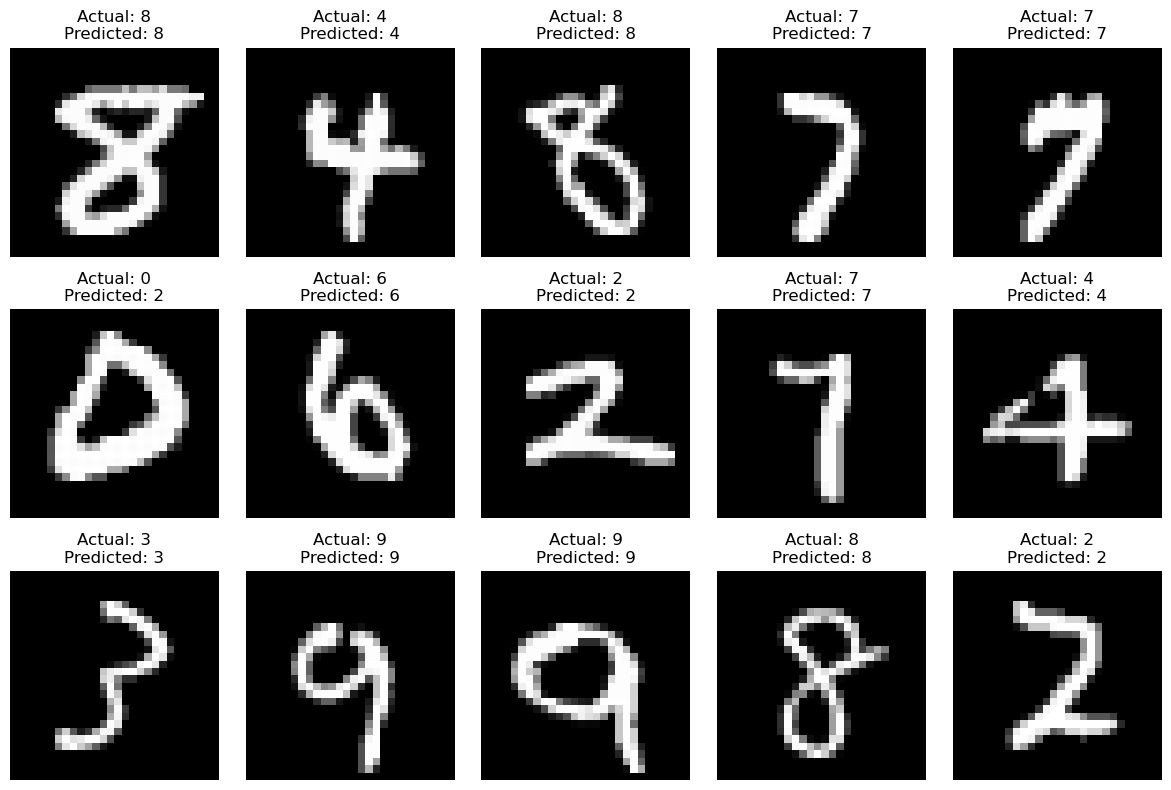

In [13]:
# Membuat prediksi pada data pengujian
predictions = model.predict(X_test_pca)
y_pred = np.argmax(predictions, axis=1)

# Menampilkan beberapa contoh hasil prediksi
num_examples_to_show = 15  # Ubah sesuai kebutuhan

# Mengatur tata letak subplot menjadi 3 baris dan 5 kolom (3x5)
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i in range(num_examples_to_show):
    sample_image = X_test.iloc[i].values
    actual_label = y_test.iloc[i]
    predicted_label = y_pred[i]

    # Menampilkan gambar di subplot yang sesuai
    ax = axes[i // 5, i % 5]
    ax.imshow(sample_image.reshape(28, 28), cmap='gray')

    # Memeriksa apakah label sesuai
    if actual_label == predicted_label:
        title_color = 'black'
    else:
        title_color = 'red'

    ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### **Akurasi**

In [14]:
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f'Akurasi pada data pengujian: {test_acc:.2f}')

438/438 [==============================] - 2s 4ms/step - loss: 0.1994 - accuracy: 0.9699
Akurasi pada data pengujian: 0.97


In [15]:
train_loss, train_acc = model.evaluate(X_train_pca, y_train)
print(f'Akurasi pada data pelatihan: {train_acc:.2f}')

1750/1750 [==============================] - 6s 3ms/step - loss: 0.0422 - accuracy: 0.9931
Akurasi pada data pelatihan: 0.99


### **Confusion Matriks**

In [16]:
# Membuat matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:')
print(confusion)

Matriks Kebingungan:
[[1316    1    6    1    0    3   10    3    1    2]
 [   0 1580    6    2    1    0    1    6    3    1]
 [   0    6 1352    1    3    2    4    7    3    2]
 [   1    0   16 1389    0   12    0    6    5    4]
 [   0    0    4    0 1247    1    8    3    1   31]
 [   4    3    1   37    4 1208    9    1    4    2]
 [   1    1    2    0    1    9 1376    0    6    0]
 [   2    2   18    1    6    1    1 1457    1   14]
 [   4    5   14   17    4    8    3    2 1295    5]
 [   2    2    2    8   18    5    0   12   12 1359]]


### **Konfigurasi Model**

*   **Lapisan Input**: Lapisan ini menerima representasi gambar setelah reduksi dimensi PCA, dan meratakan data menjadi satu dimensi. Ini penting karena sebagian besar model ANN mengharapkan masukan dalam bentuk vektor satu dimensi.

*   **Hidden Layers**: Ada dua lapisan tersembunyi dengan aktivasi ReLU. Jumlah neuron pada lapisan pertama adalah 128, dan pada lapisan kedua adalah 64. Penggunaan ReLU digunakan untuk mengatasi masalah non-linearitas.

*   **Output Layer**: Lapisan keluaran memiliki 10 neuron, yang sesuai dengan jumlah kelas yang mungkin dalam klasifikasi digit dari 0 hingga 9. Penggunaan fungsi aktivasi softmax di lapisan ini menghasilkan probabilitas distribusi kelas, yang memungkinkan model mengeluarkan prediksi kelas yang paling mungkin.

*   **Learning Rate dan Optimizer** : Learning rate sebesar 0.001 digunakan dengan optimizer Adam. Nilai ini adalah pilihan yang umum dan seringkali memberikan konvergensi yang baik dalam pelatihan. Adam adalah optimizer yang efisien dan adaptif yang banyak digunakan dalam deep learning.

*   **Fungsi Kerugian** ('sparse_categorical_crossentropy'): Fungsi kerugian yang digunakan 'sparse_categorical_crossentropy'. Fungsi ini mengukur kesalahan dalam klasifikasi dan membantu model untuk mengoptimalkan prediksi kelas.
